# FLIP ROBO TECHNOLOGIES

# NAME: BIJAY PAREEK

# BATCH NO: DS2308

# Projects Evaluation Phase 2:

# Global Power Plant Database

# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database

## The database includes the following indicators:
	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


# Fuel Type Aggregation

## We define the "Fuel Type" attribute of our database based on common fuel categories.

## Prediction :   Make two prediction 

## 1) Primary Fuel  

## 2) capacity_mw 


## Dataset Link-

•	https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv



# import necessary libaries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import power_transform
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Loading the dataset from csv file:

In [2]:
df = pd.read_csv(r"C:/Users/raj/Downloads/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Here are the columns name present in the dataset------------")
df.columns

Here are the columns name present in the dataset------------


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
print("Here are the total dataset informations -----------,")
df.value_counts

Here are the total dataset informations -----------,


<bound method DataFrame.value_counts of     country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407    

# Note: we are going to remove some columns those having maximum no of null values because if we fill those values prediction will not correct

In [5]:
print("Here is the total rows and columns present in the dataset------------")
df.shape

Here is the total rows and columns present in the dataset------------


(907, 27)

# Now  we removed the unwanted columns :

'estimated_generation_gwh'

'wepp_id',

'other_fuel3',

'other_fuel1'

'other_fuel2',

'gppd_idnr

'owner'

'generation_data_source'

'name',

'url',

'year_of_capacity_data'

,'generation_gwh_2013',

'generation_gwh_2018',

'generation_gwh_2019'

'country'

'country_long'

# Note : i removed the above columns which has less data and more nan, which simply affected the prediction

In [6]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2','gppd_idnr','owner','country','country_long','generation_data_source','name','url','year_of_capacity_data','generation_gwh_2013','generation_gwh_2018','generation_gwh_2019'],axis=1,inplace=True)

In [7]:
print("Here we can see our data set after droping the unnecessary columns---------")
df.columns

Here we can see our data set after droping the unnecessary columns---------


Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017'],
      dtype='object')

# Now we will see the nan in the dataset:

In [8]:
print("Here the total nan present in the dataset-------------------")
df.isnull().sum()

Here the total nan present in the dataset-------------------


capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
dtype: int64

# Note: we can see the nan present in the data set now lets us remove the nan:

# Missing Value Imputation of geolocation with mode

In [9]:
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

##  Missing Value Imputation of longitude with median:

In [10]:
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

## Missing Value Imputation of latitude with mean:

In [11]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

# filling null values with median in numerical columns:

In [12]:
df.fillna(df.median()[0], inplace=True)

# checking for the nan:

In [13]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

# Thus we removed the NaN:

# [Data visualisation]:

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

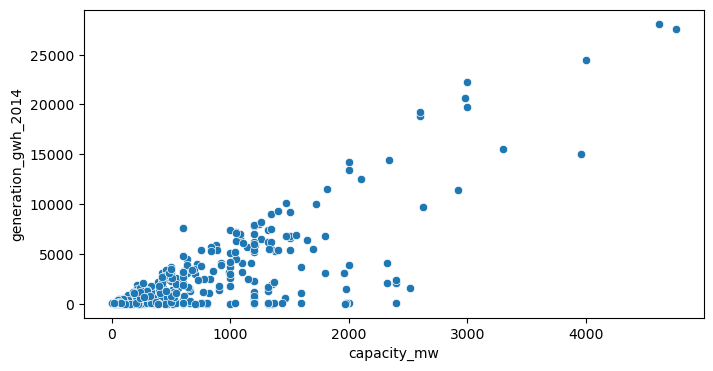

In [14]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

## NOTE: In 2014 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

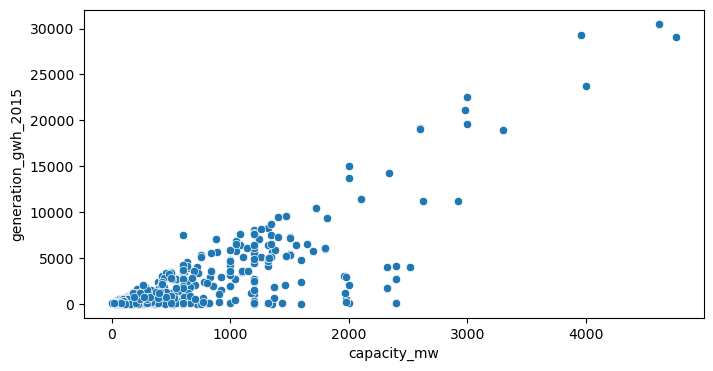

In [15]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

## NOTE: In 2015 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2015

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

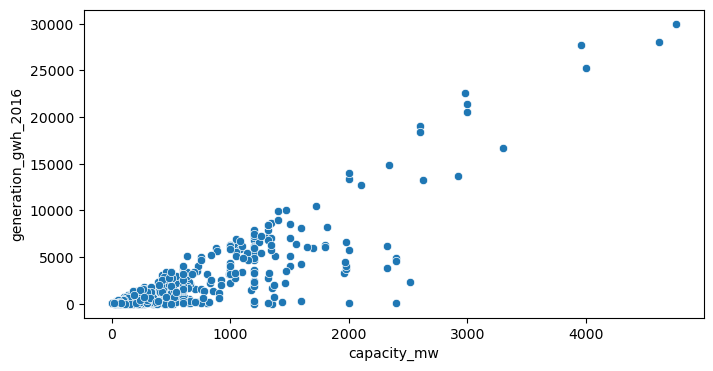

In [16]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

## NOTE: In 2016 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2016

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

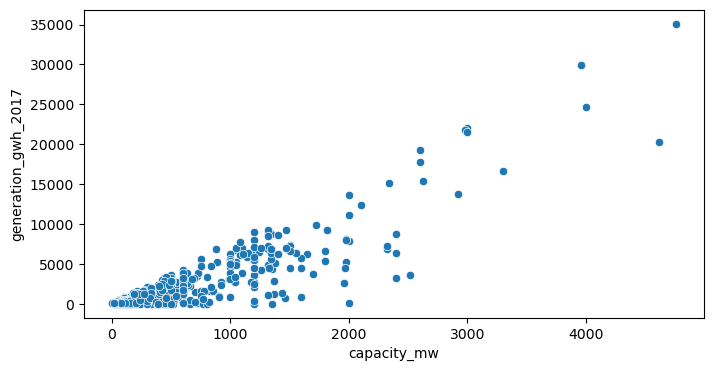

In [17]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

## NOTE: In 2017 we can also notice here as electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2017

<AxesSubplot:xlabel='capacity_mw', ylabel='latitude'>

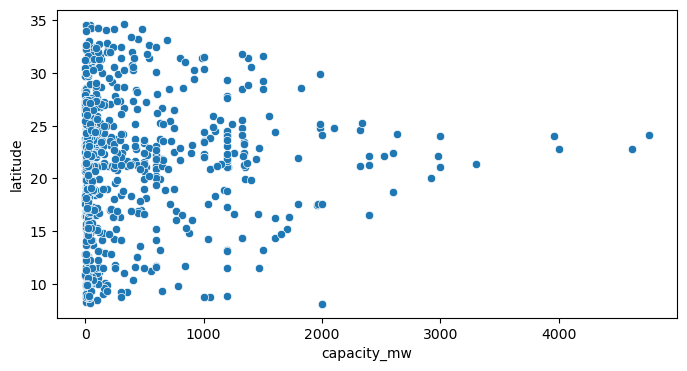

In [18]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

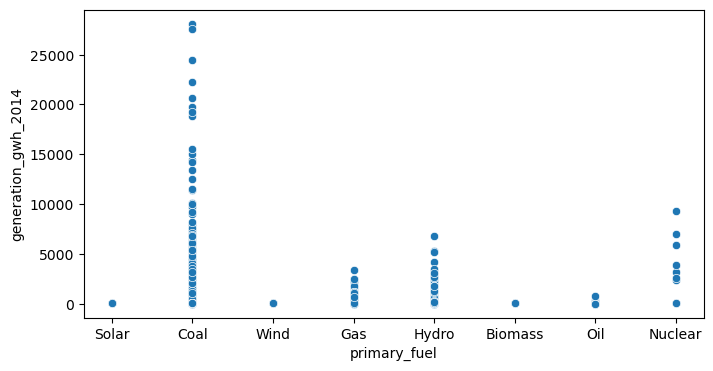

In [19]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

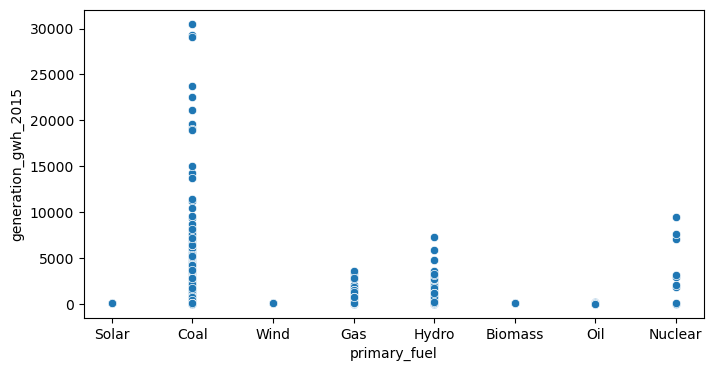

In [20]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

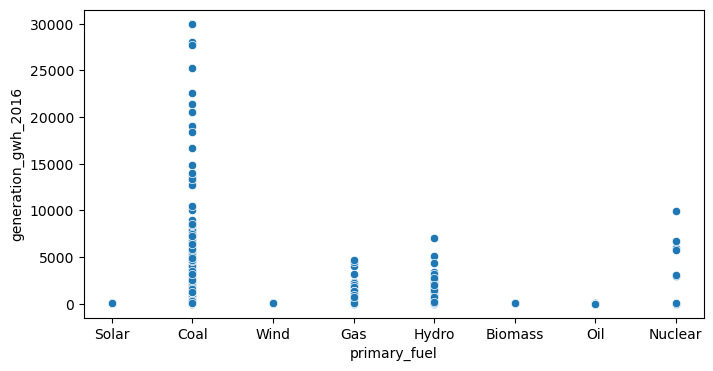

In [21]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

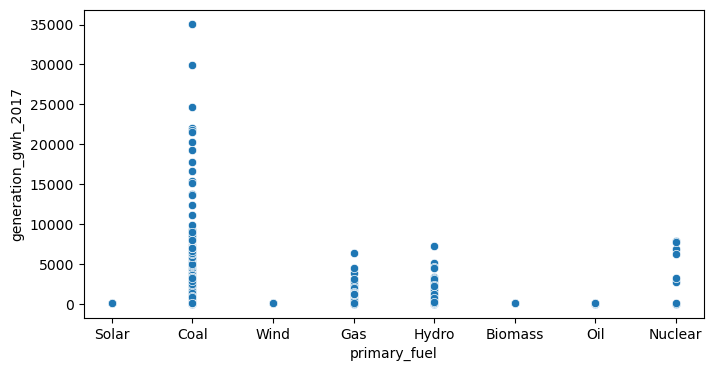

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

# observation:

In all of the years the coal is most used fuel and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

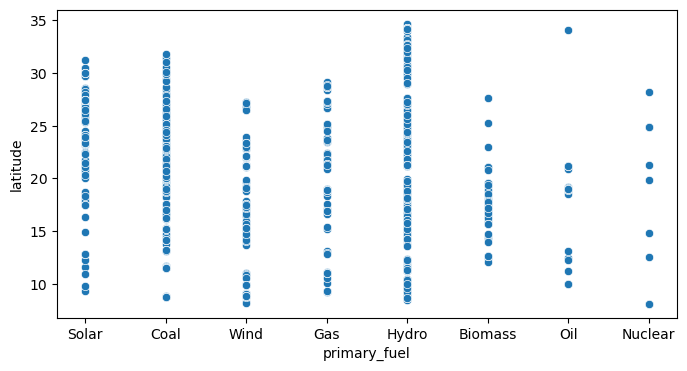

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

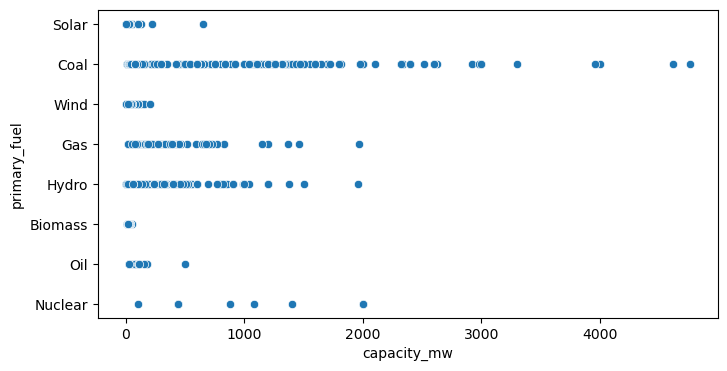

In [24]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

# NOTE: Coal is on max electrical generating capacity in megawatts

# [Now we will used LabelEncoder for convering categorical to numerical]:

In [25]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [26]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [27]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [28]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [29]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,2011.0,109,1,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,1,59.2,174,2,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,7,59.2,21,2,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,59.200000,0.994875,233.596650,865.400000
903,3.0,12.8932,78.1654,6,59.2,77,0,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,7,59.2,21,2,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,1,59.2,59,2,59.200000,59.200000,59.200000,59.200000


In [30]:
print("Here we convert all columns into numerical ---------",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
dtypes: float64(8), int32(3)
memory usage: 67.4 KB
Here we convert all columns into numerical --------- None


# Now we will see the outliers present in the dataset using (boxplot):

Here is the boxplot graph for outliers in the dataset.............. 


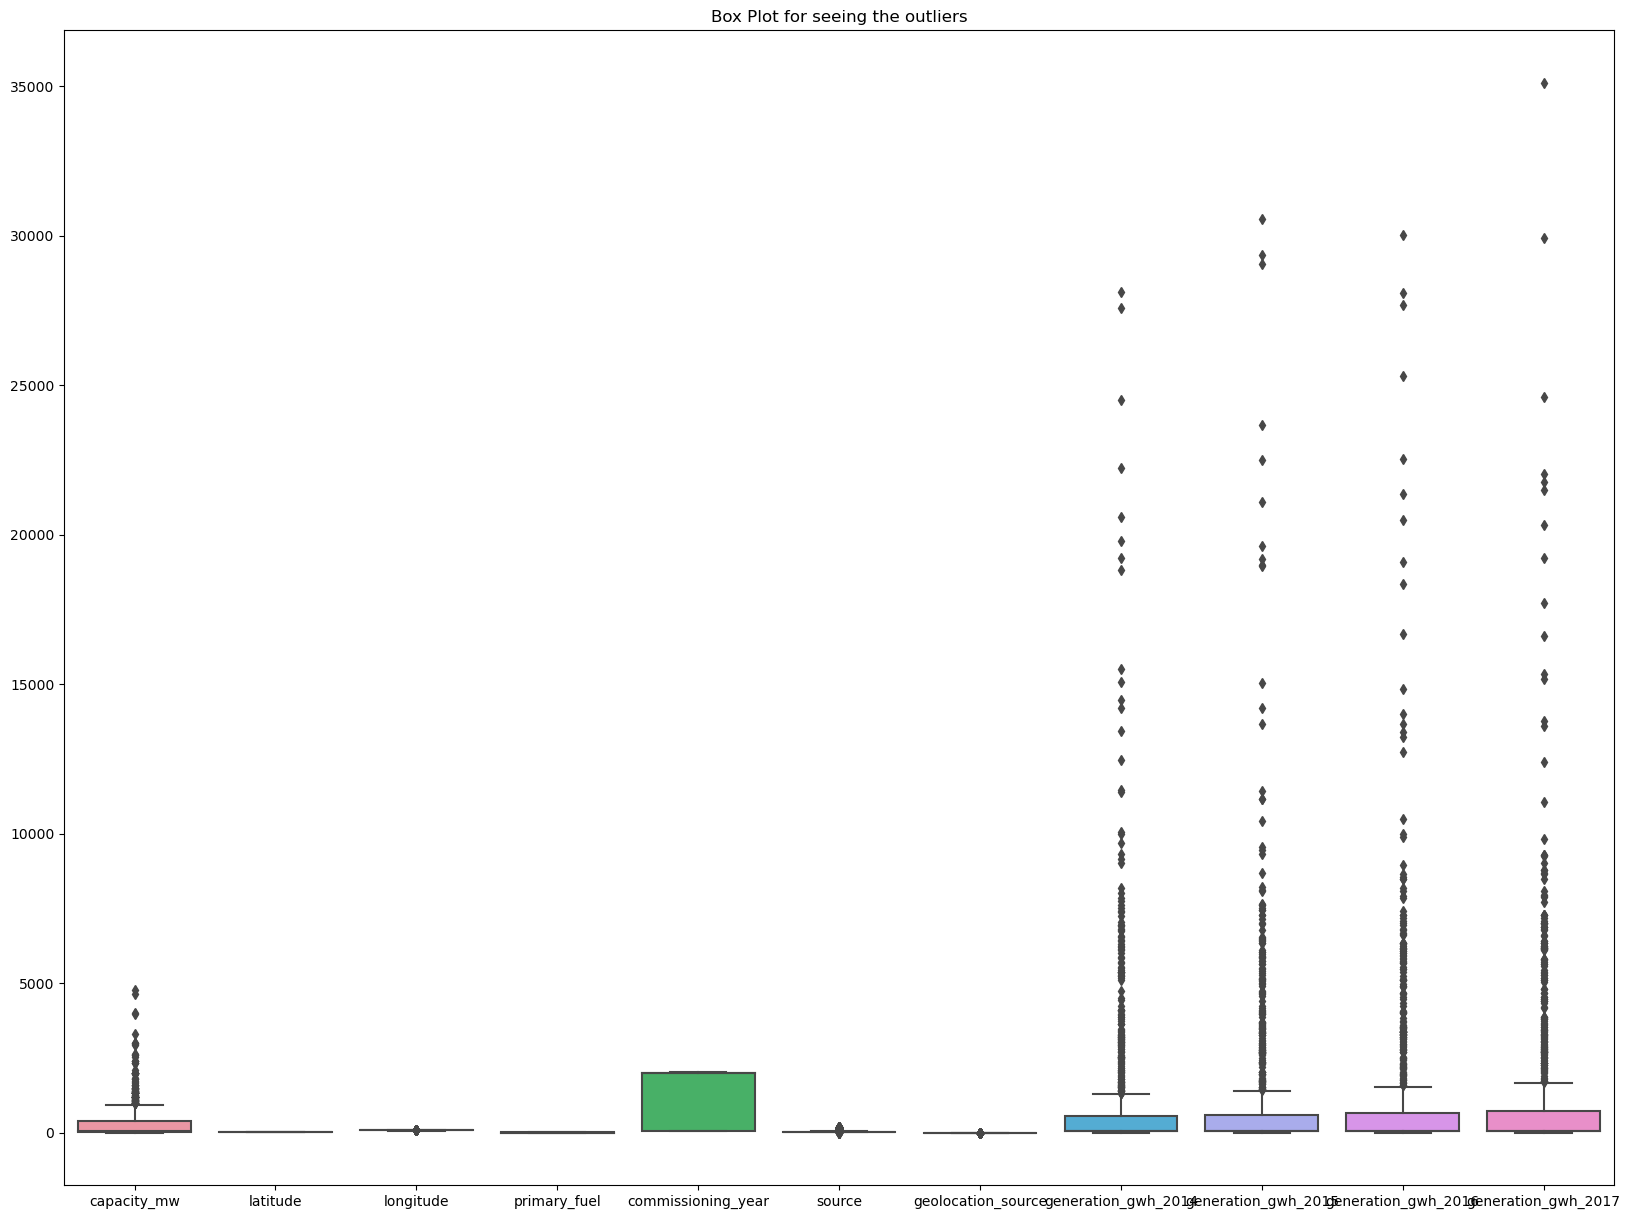

In [31]:
cols=['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017']

print("Here is the boxplot graph for outliers in the dataset.............. ")

plt.figure(figsize=(20, 15))
sns.boxplot(data=df[cols],orient='p')
plt.title('Box Plot for seeing the outliers')
plt.show()

# Note: Based on the graph we can see outliers in the dataset and we have to remove the outliers:

In [32]:
from scipy.stats import zscore

z=np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 147, 158, 209, 209,
       209, 209, 209, 308, 308, 308, 308, 308, 363, 364, 364, 364, 364,
       364, 375, 482, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494,
       532, 623, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 695,
       695, 695, 695, 695, 721, 721, 721, 721, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 788, 808, 808,
       808, 808, 808, 880, 880, 880, 880, 880], dtype=int64), array([1, 2, 3, 4, 0, 1, 2, 3, 4, 4, 0, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 4,
       0, 1, 2, 3, 4, 4, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 0, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 4, 4, 0, 1, 2, 3, 4, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
      dtype=int64))


In [33]:
z = np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (907, 11)
Shape of the dataframe after removing outliers:  (882, 11)
Percentage of data loss post outlier removal:  2.7563395810363835


# After removing the outliers we have total rows and columns:

In [34]:
df.shape

(882, 11)

# Now we will see the sknewness in the dataset:

Here is the skewnwess present in the dataset.............


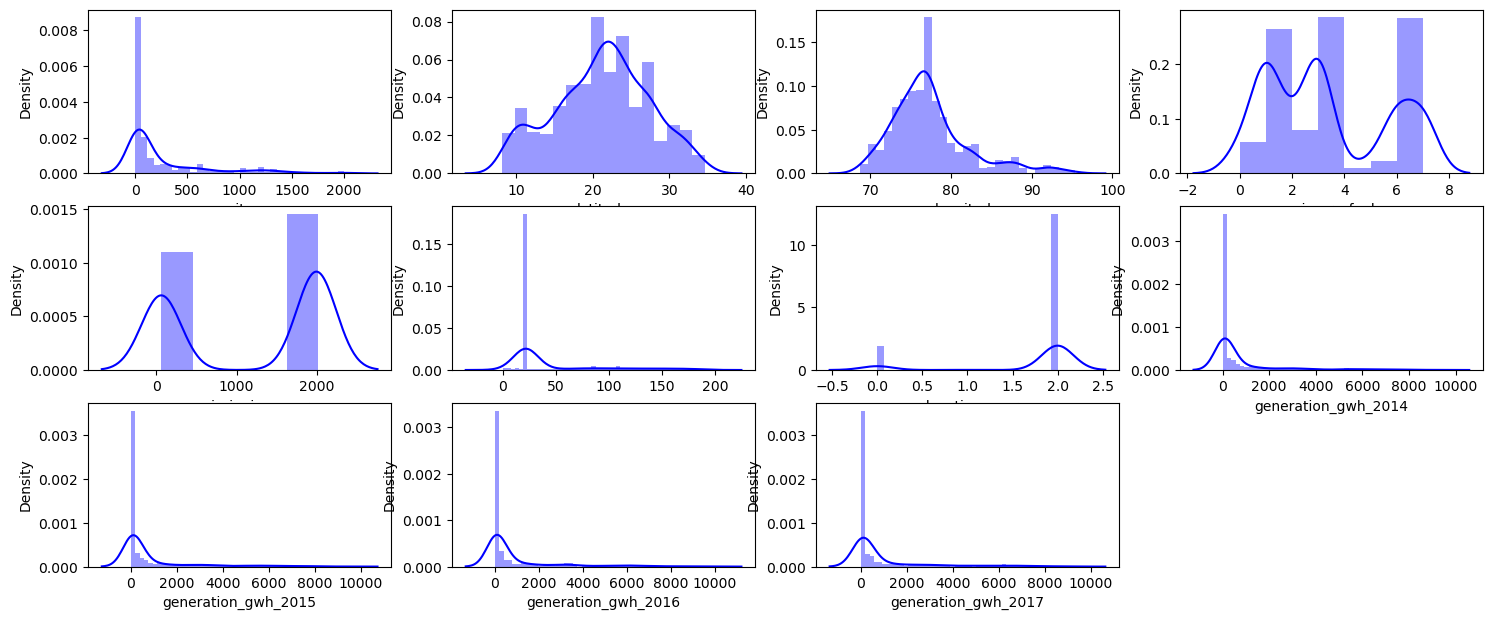

In [35]:
print("Here is the skewnwess present in the dataset.............")

plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

In [36]:
print("Here is the total sknew in the dataset",df.skew())

Here is the total sknew in the dataset capacity_mw            2.054665
latitude              -0.139645
longitude              1.224086
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014    2.885639
generation_gwh_2015    2.711018
generation_gwh_2016    2.651120
generation_gwh_2017    2.563221
dtype: float64


skewness more than+/- 0.5 will we treated

object columns will no be treated

# Now we will  power_transform the skewness:

In [37]:
print("Here we apply power transform to the entire DataFrame--")
transformed_data = power_transform(df,standardize=False)
transformed_data

Here we apply power transform to the entire DataFrame--


array([[ 1.23003009, 36.35469056,  0.18826772, ...,  3.86234011,
         3.89545525,  3.95886151],
       [ 4.29896262, 31.57993483,  0.18826772, ...,  3.86234011,
         3.89545525,  3.95886151],
       [ 3.50083006, 27.629385  ,  0.18826772, ...,  3.86234011,
         3.89545525,  3.95886151],
       ...,
       [ 3.12459609, 18.68360114,  0.18826772, ...,  3.86234011,
         3.89545525,  3.95886151],
       [ 4.12307349, 31.00251641,  0.18826772, ...,  3.86234011,
         3.89545525,  3.95886151],
       [ 2.74537135, 11.73588652,  0.18826772, ...,  3.86234011,
         3.89545525,  3.95886151]])

In [38]:
print(" Create a new DataFrame with the transformed data")

df_transformed = pd.DataFrame(transformed_data, columns=df.columns)
df_transformed

 Create a new DataFrame with the transformed data


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,1.230030,36.354691,0.188268,2.602430,21.661696,2.796990,14.492456,3.872799,3.862340,3.895455,3.958862
1,4.298963,31.579935,0.188268,0.766517,6.968279,2.936456,212.013914,3.872799,3.862340,3.895455,3.958862
2,3.500830,27.629385,0.188268,2.839706,6.968279,2.170754,212.013914,3.872799,3.862340,3.895455,3.958862
3,4.575178,30.339592,0.188268,1.290501,21.640125,2.191554,212.013914,5.885978,6.118249,6.244946,6.154855
4,6.729367,27.706899,0.188268,0.766517,21.673997,2.191554,212.013914,7.187290,7.673046,7.853435,7.996425
...,...,...,...,...,...,...,...,...,...,...,...
877,6.634720,20.038362,0.188268,0.766517,21.677069,2.191554,212.013914,3.872799,0.683675,5.103070,6.391639
878,1.358493,15.550472,0.188268,2.602430,6.968279,2.683062,0.000000,3.872799,3.862340,3.895455,3.958862
879,3.124596,18.683601,0.188268,2.839706,6.968279,2.170754,212.013914,3.872799,3.862340,3.895455,3.958862
880,4.123073,31.002516,0.188268,0.766517,6.968279,2.589452,212.013914,3.872799,3.862340,3.895455,3.958862


In [39]:
print("Display skewness after the transformation--------")
      
print("\nSkewness after Power Transform:")
print(df_transformed.skew())

Display skewness after the transformation--------

Skewness after Power Transform:
capacity_mw            0.016603
latitude              -0.076888
longitude              0.000000
primary_fuel          -0.058359
commissioning_year    -0.279711
source                -0.194541
geolocation_source    -2.085795
generation_gwh_2014   -0.016889
generation_gwh_2015   -0.015204
generation_gwh_2016   -0.011726
generation_gwh_2017   -0.006580
dtype: float64


# ['capacity_mw' as target ]

# [creating Regression]

# Now we will seperate the dataset  into X(feature) and Y(label):

In [40]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [41]:
print("Here are the feature of the dataset-----------------")
x

Here are the feature of the dataset-----------------


,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,28.1839,73.2407,6,2011.0,109,1,59.200000,59.200000,59.200000,59.200000
1,24.7663,74.6090,1,59.2,174,2,59.200000,59.200000,59.200000,59.200000
2,21.9038,69.3732,7,59.2,21,2,59.200000,59.200000,59.200000,59.200000
3,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500
4,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,2016.0,22,2,59.200000,0.994875,233.596650,865.400000
903,12.8932,78.1654,6,59.2,77,0,59.200000,59.200000,59.200000,59.200000
904,15.2758,75.5811,7,59.2,21,2,59.200000,59.200000,59.200000,59.200000
905,24.3500,73.7477,1,59.2,59,2,59.200000,59.200000,59.200000,59.200000


In [42]:
print("Here are the label of dataset--------------")
y

Here are the label of dataset--------------


0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 882, dtype: float64

# [scaling X values]:

In [43]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [44]:
print("Here are the scaled data present in the x")
x

Here are the scaled data present in the x


array([[0.75585062, 0.1717277 , 0.85714286, ..., 0.00626256, 0.00598754,
        0.00638508],
       [0.62678766, 0.22285368, 0.14285714, ..., 0.00626256, 0.00598754,
        0.00638508],
       [0.51868762, 0.02722011, 1.        , ..., 0.00626256, 0.00598754,
        0.00638508],
       ...,
       [0.26838645, 0.25917581, 1.        , ..., 0.00626256, 0.00598754,
        0.00638508],
       [0.61106642, 0.19067155, 0.14285714, ..., 0.00626256, 0.00598754,
        0.00638508],
       [0.06667271, 0.33000788, 1.        , ..., 0.00626256, 0.00598754,
        0.00638508]])

In [45]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.491442,0.325196,0.466958,0.562984,0.234037,0.862812,0.081043,0.083716,0.084548,0.094683
std,0.231744,0.179459,0.325982,0.490143,0.237462,0.342589,0.173033,0.174021,0.172960,0.191004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.332009,0.213431,0.142857,0.000000,0.115789,1.000000,0.006342,0.006263,0.005988,0.006385
50%,0.493444,0.301712,0.428571,0.978048,0.115789,1.000000,0.006342,0.006263,0.005988,0.006385
75%,0.644421,0.391068,0.857143,0.991832,0.188158,1.000000,0.048437,0.051690,0.048640,0.058863
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Note: Thus data has been scalled

# [Model Building]:

# [Linear Regression]:


## splitting the data into 73% training and 27% testing:

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [47]:
print("Here we will keep the all the model which is sutiable for dataset and pass the model to a loop and see the result---------")


models=[LinearRegression(),
        DecisionTreeRegressor(),
        Ridge(),
        DecisionTreeRegressor(),
       GradientBoostingRegressor()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("Result",i,"model =")
    print(f"r2 score is",(r2_score(y_test,pred_y)*100))
    cross_score=cross_val_score(i,x,y,cv=3).mean()*100
    print("cross validation score is",cross_score)
    print('\n')
    

Here we will keep the all the model which is sutiable for dataset and pass the model to a loop and see the result---------
Result LinearRegression() model =
r2 score is 79.41154533516656
cross validation score is 71.27773703016386


Result DecisionTreeRegressor() model =
r2 score is 58.246106914688454
cross validation score is 60.97524612675589


Result Ridge() model =
r2 score is 79.97594239818307
cross validation score is 72.56616849635131


Result DecisionTreeRegressor() model =
r2 score is 68.00573660012357
cross validation score is 60.23596637060823


Result GradientBoostingRegressor() model =
r2 score is 78.69855233766502
cross validation score is 76.13913737308961




## Note : Based on my observation i will choose GradientBoostingRegressor for hyper parameter tunning:

# HYPER PARAMETER TUNING:

# GridSearchCV:

# GradientBoostingRegressor

In [48]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [49]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [50]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [51]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [52]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 24585.451381677998
MAE: 85.08505111521207
r2_score: 0.8159574397268092


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

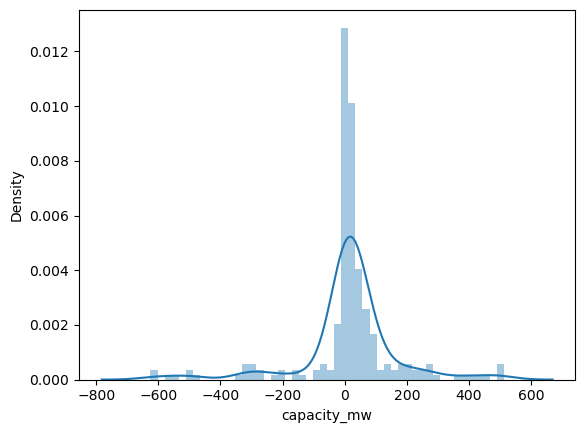

In [53]:
sns.distplot(GF_grid_pred-y_test)

# Now we will create best fit line on the data :

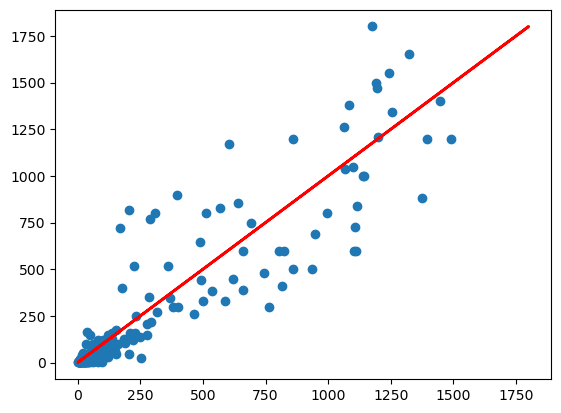

In [54]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

## Note : we can say choosing GradientBoostingRegressor as the best model

In [55]:
import joblib

In [56]:
joblib.dump(GF_grid.best_estimator_,'Global Power Plant Database Regression.obj')

['Global Power Plant Database Regression.obj']

# Now we will take 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL

In [57]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [58]:
x

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,2011.0,109,1,59.200000,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,59.2,174,2,59.200000,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,59.2,21,2,59.200000,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,2004.0,22,2,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.0,22,2,59.200000,0.994875,233.596650,865.400000
903,3.0,12.8932,78.1654,59.2,77,0,59.200000,59.200000,59.200000,59.200000
904,25.5,15.2758,75.5811,59.2,21,2,59.200000,59.200000,59.200000,59.200000
905,80.0,24.3500,73.7477,59.2,59,2,59.200000,59.200000,59.200000,59.200000


In [59]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 882, dtype: int32

# Spliting Train and Test data:

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

# MODEL BUILDING:

In [61]:
print("Here we will keep the all the model which is sutiable for dataset and pass the model to a loop and see the result---------")


models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for i in models:
    i.fit(x_train,y_train)
    pred_y=i.predict(x_test)
    print("Result",i,"model =")
    print(f"r2 score is",(r2_score(y_test,pred_y)*100))
    cross_score=cross_val_score(i,x,y,cv=3).mean()*100
    print("cross validation score is",cross_score)
    print('\n')
    

Here we will keep the all the model which is sutiable for dataset and pass the model to a loop and see the result---------
Result LogisticRegression() model =
r2 score is 7.151030556458126
cross validation score is 64.5124716553288


Result DecisionTreeClassifier() model =
r2 score is 84.1312670405583
cross validation score is 79.81859410430839


Result KNeighborsClassifier() model =
r2 score is 34.58368061932276
cross validation score is 71.42857142857143


Result RandomForestClassifier() model =
r2 score is 87.1699605859833
cross validation score is 84.80725623582767




## Note: Based on my observation i can say that the [RandomForestClassifier] for hyper parameter tunning:

# HYPER PARAMETER TUNING:

In [62]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [63]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [64]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8702928870292888


In [65]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 3,
 'n_estimators': 50,
 'random_state': 10}

# model training with best parameters:

In [66]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [67]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [68]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8535564853556485


# Report of RandomForestClassifier:

In [69]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.77      0.85      0.81        75
           2       0.56      0.28      0.37        18
           3       0.91      0.94      0.93        67
           4       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4
           6       1.00      1.00      1.00        33
           7       0.97      1.00      0.98        29

    accuracy                           0.85       239
   macro avg       0.69      0.67      0.67       239
weighted avg       0.83      0.85      0.84       239



In [70]:
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.944658 (macro),
0.954855 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.957227 (macro),
0.968762 (weighted by prevalence)


# Thus i can model perform well:

# Saving Model:

In [71]:
joblib.dump(best_rfc_grid.best_estimator_,'Global Power Plant Classification.obj')

['Global Power Plant Classification.obj']

In [72]:
#########################################################Thank you###################################################################